In [1]:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [4]:
from google.colab import files
upl = files.upload()

Saving spam.csv to spam.csv


In [5]:
data =  pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [6]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# 1.Data Cleaning

In [7]:
data.shape

(5572, 5)

In [8]:
data.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
data.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [12]:
data.sample(5)

,target,text
3656,ham,Studying. But i.ll be free next weekend.
4762,ham,Prepare to be pleasured :)
2430,ham,How was txting and driving
3590,ham,How much would it cost to hire a hitman
1168,ham,Ok . . now i am in bus. . If i come soon i wil...


In [13]:
# Now we must encode: spam = 1 , not spam = 0

from sklearn.preprocessing import LabelEncoder

encoded = LabelEncoder()

In [14]:
data['target'] = encoded.fit_transform(data['target'])

In [15]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data.duplicated().sum()

403

In [17]:
data.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA

In [18]:
data['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

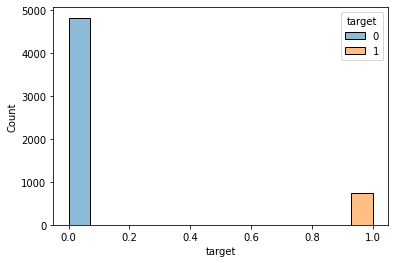

In [19]:
sns.histplot(data=data, x=data['target'], hue=data['target'])

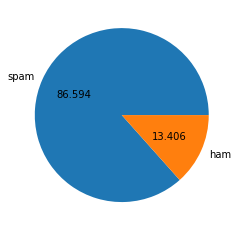

In [20]:
plt.pie(data['target'].value_counts(), labels=['spam','ham'], autopct='%.3f')
plt.show()

In [21]:
!pip install nltk

In [22]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
data['num_chars'] = data['text'].apply(len)

In [25]:
data.tail()

,target,text,num_chars
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125
5571,0,Rofl. Its true to its name,26


In [26]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [27]:
data.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
data.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


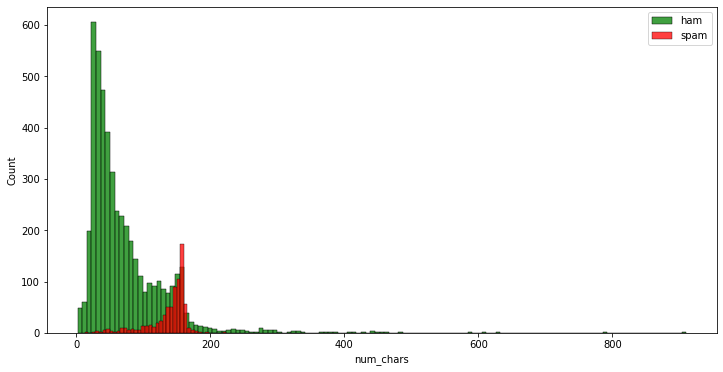

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_chars'], color='green')
sns.histplot(data[data['target']==1]['num_chars'], color='red')
plt.legend(['ham' ,'spam'])



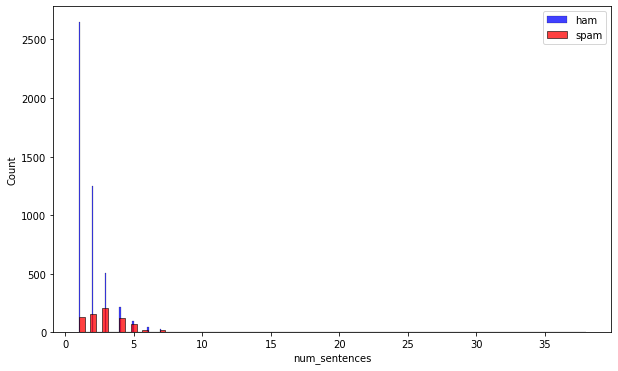

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['target']==0]['num_sentences'], color='blue')
sns.histplot(data[data['target']==1]['num_sentences'], color='red')
plt.legend(['ham' ,'spam'])


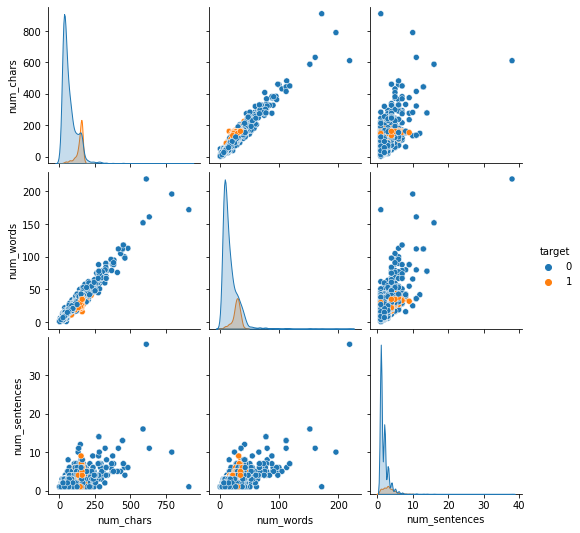

In [32]:
sns.pairplot(data,hue='target')

# 3. Data Preprocessing
##### Lower case
##### Tokenization
##### Removing special characters
##### Removing stop words and punctuation
##### Stemming

In [33]:
from nltk.corpus import stopwords
nltk.download("stopwords")
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

In [35]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y = []
  for i in text:
      if i.isalnum():    # Keeps only alphanumeric characters 
         y.append(i)

  text=y[:]
  y.clear()

  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:  # removes stopwords and special characters
         y.append(i)

  text=y[:]
  y.clear()

  for i in text:
     y.append(ps.stem(i))



  return " ".join(y)

In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
transform_text("eleSA IS F*cking goddess!!")

'elesa goddess'

In [38]:
# We apply the function to all the texts

data['text_trans'] = data['text'].apply(transform_text)

In [39]:
data.head()

,target,text,num_chars,num_words,num_sentences,text_trans
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
data.tail()

,target,text,num_chars,num_words,num_sentences,text_trans
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud, STOPWORDS

In [43]:

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(data[data['target'] == 1]['text_trans'].str.cat(sep=" "))

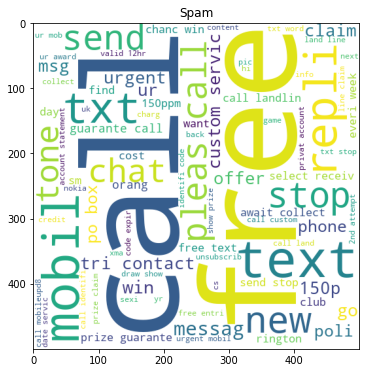

In [44]:
plt.figure(figsize=(18,6))
plt.imshow(spam_wc)
plt.title('Spam')
plt.show()

In [45]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='grey')

ham_wc = wc.generate(data[data['target'] == 0]['text_trans'].str.cat(sep=" "))

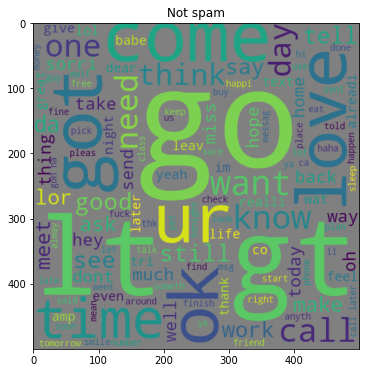

In [46]:
plt.figure(figsize=(18,6))
plt.imshow(ham_wc)
plt.title('Not spam')
plt.show()

In [47]:
# Now we will see the words used in spam texts

spam_corpus = []
for x in data[data['target'] == 1]['text_trans'].tolist():
    for word in x.split():
        spam_corpus.append(word)

In [48]:
spam_corpus[:10]

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']

In [49]:
len(spam_corpus)

11424

In [50]:
# And now we will see the words used in NOT spam texts

ham_corpus = []
for x in data[data['target'] == 0]['text_trans'].tolist():
    for word in x.split():
        ham_corpus.append(word)

In [51]:
ham_corpus[:10]

['go', 'jurong', 'point', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e']

In [52]:
len(ham_corpus)

37417

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


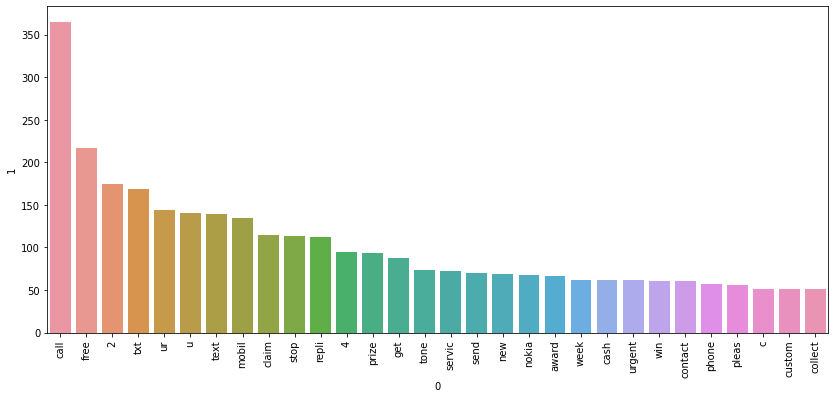

In [53]:
from collections import Counter
plt.figure(figsize=(14,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


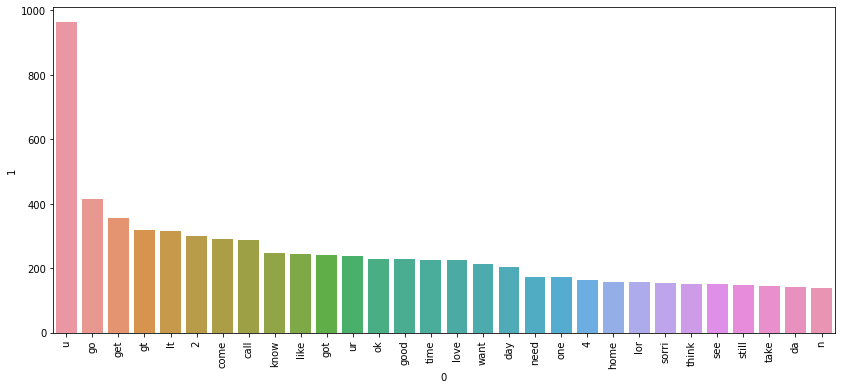

In [54]:
plt.figure(figsize=(14,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Build the Model 

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(data['text_trans']).toarray()

In [57]:
y = data['target'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
 gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_pred1 = gnb.predict(X_test)
print({'accuracy:' : accuracy_score(y_test,y_pred1)})
print(confusion_matrix(y_test,y_pred1))
print({'precision_score:' : precision_score(y_test,y_pred1)})

{'accuracy:': 0.862780269058296}
[[835 122]
 [ 31 127]]
{'precision_score:': 0.5100401606425703}


In [64]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
y_pred2 = mnb.predict(X_test)
print({'accuracy:' : accuracy_score(y_test,y_pred2)})
print(confusion_matrix(y_test,y_pred2))
print({'precision_score:' : precision_score(y_test,y_pred2)})

{'accuracy:': 0.9641255605381166}
[[956   1]
 [ 39 119]]
{'precision_score:': 0.9916666666666667}


In [66]:
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [67]:
y_pred3 = bnb.predict(X_test)
print({'accuracy:' : accuracy_score(y_test,y_pred3)})
print(confusion_matrix(y_test,y_pred3))
print({'precision_score:' : precision_score(y_test,y_pred3)})

{'accuracy:': 0.9766816143497757}
[[955   2]
 [ 24 134]]
{'precision_score:': 0.9852941176470589}


In [68]:
# We can use other classifiers to improve score

# In practice

In [101]:
input_text = input("Write the text you want to check for spam: ")

Write the text you want to check for spam: Free entry in 2 a wkly comp to win FA Cup fina..


In [103]:
transformed_text = transform_text(input_text)

transformed_text

'free entri 2 wkli comp win fa cup'

In [104]:
vector = tfidf.transform([transformed_text])

vector

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [105]:
vec = vector.toarray()

vec

array([[0., 0., 0., ..., 0., 0., 0.]])

In [106]:
mnb.predict(vec)[0]

1

In [107]:
 result = mnb.predict(vector)[0]

 if result==1:
  print('spam')
 else:
  print('not spam')

spam


In [108]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))